In [6]:
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv('Train.csv')

In [6]:
data.shape

(8523, 12)

In [50]:
data.sample(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1364,DRF25,9.000,Low Fat,0.038925,Soft Drinks,34.9190,OUT046,1997,Small,Tier 1,Supermarket Type1,476.0470
372,NCA54,16.500,Low Fat,0.036716,Household,180.0318,OUT045,2002,NaN,Tier 2,Supermarket Type1,3969.4996
5752,FDI15,13.800,Low Fat,0.141326,Dairy,265.0884,OUT035,2004,Small,Tier 2,Supermarket Type1,8479.6288
2719,FDU44,12.150,Regular,0.058756,Fruits and Vegetables,161.0552,OUT017,2007,NaN,Tier 2,Supermarket Type1,3411.5592
3102,DRL35,15.700,Low Fat,0.030751,Hard Drinks,42.5770,OUT049,1999,Medium,Tier 1,Supermarket Type1,952.0940
7097,NCW29,14.000,Low Fat,0.029026,Health and Hygiene,131.3310,OUT017,2007,NaN,Tier 2,Supermarket Type1,3635.2680
2324,FDW38,5.325,Regular,0.232122,Dairy,55.5298,OUT010,1998,NaN,Tier 3,Grocery Store,53.9298
1227,FDT31,19.750,Low Fat,0.012448,Fruits and Vegetables,188.2872,OUT046,1997,Small,Tier 1,Supermarket Type1,2647.2208


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [51]:
# Categorical columns exploration
data['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [35]:
def unique_value(columns_name):
    return data[columns_name].value_counts()

In [44]:
unique_value('Item_Fat_Content')

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [45]:
unique_value('Item_Type')

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [48]:
unique_value('Outlet_Identifier')

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [49]:
unique_value('Outlet_Type')

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [53]:
unique_value('Outlet_Size')

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [54]:
unique_value('Outlet_Location_Type')

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [55]:
# Numerical columns exploration
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Observations
* We can drop Item_Identifier and Outlet_Identifier.
* We have to impute nan values of Item_Weight and Outlet_Size.
* We can also tranfrom the column Outlet_Establishment_Year into Age_of_Outlet.
* Frequency of Supermarket Type1 is very high in Outlet_type as compare to other columns.
* Frequency of Low Fat is also high in Item_Fat_Content.

In [56]:
data.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [57]:
# create a copy of these dataframe

df = data.copy()

In [59]:
import seaborn as sns

<AxesSubplot:xlabel='Item_Weight', ylabel='Count'>

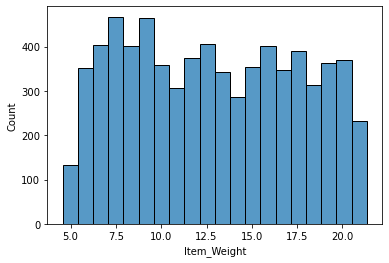

In [61]:
sns.histplot(data=df,x='Item_Weight')

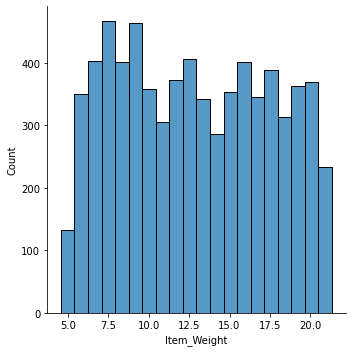

In [62]:
sns.displot(df['Item_Weight'])

C:\Users\HP\new_anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

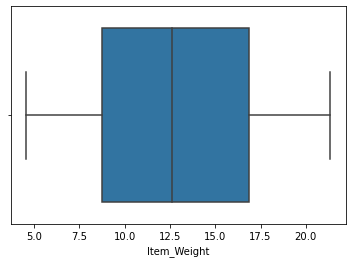

In [63]:
sns.boxplot(df['Item_Weight'])

* There is no outlier in Item_Weight data

In [64]:
df['Item_Weight'].skew()

0.0824262091221237

* It also not a skeweed data

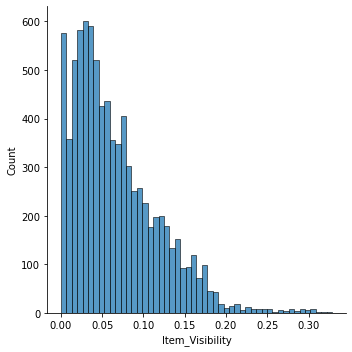

In [65]:
sns.displot(data=df, x = 'Item_Visibility')

<AxesSubplot:xlabel='Item_Visibility'>

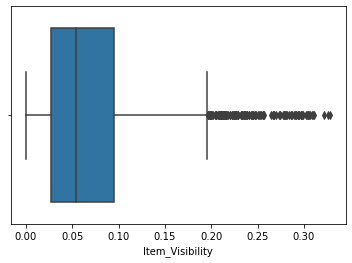

In [70]:
sns.boxplot(data=df, x = 'Item_Visibility')

In [72]:
df['Item_Visibility'].skew()

1.1670905496918396

* There are outliers in Item_Visibility
* It is a right skeweed Data

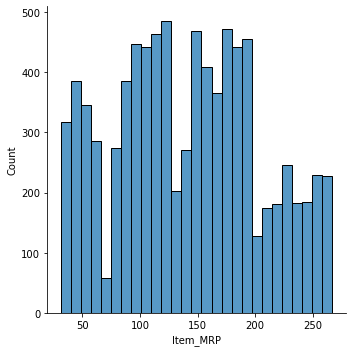

In [73]:
sns.displot(data=df, x= 'Item_MRP')

C:\Users\HP\new_anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_MRP'>

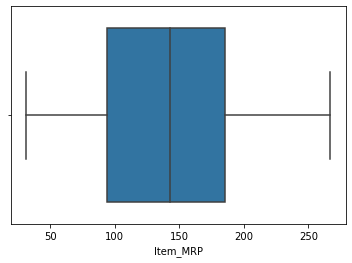

In [75]:
sns.boxplot(df['Item_MRP'])

In [76]:
df['Item_MRP'].skew()

0.1272022683110526

* There is no outlier in Item_MRP also not a skeweed data.

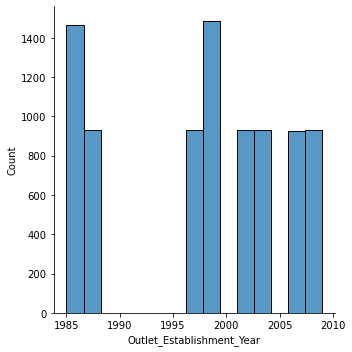

In [81]:
sns.displot(data=df, x='Outlet_Establishment_Year')

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

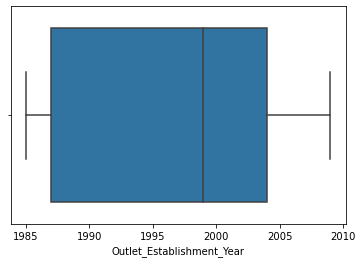

In [82]:
sns.boxplot(data=df, x='Outlet_Establishment_Year')

In [83]:
df['Outlet_Establishment_Year'].skew()

-0.39664078591550556

In [84]:
df['Age_Outlet'] = 2022 - df['Outlet_Establishment_Year'] 

<AxesSubplot:xlabel='Age_Outlet'>

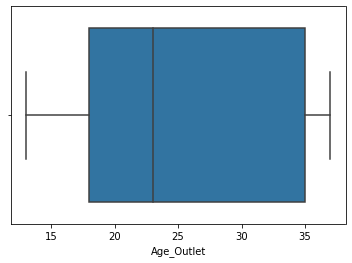

In [86]:
sns.boxplot(data=df, x = 'Age_Outlet')

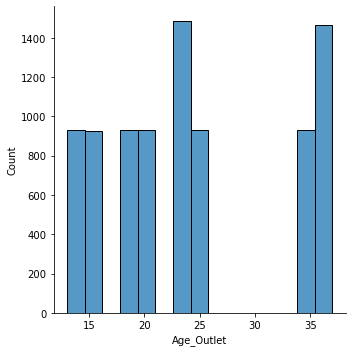

In [87]:
sns.displot(data=df, x='Age_Outlet')

* Outlet_Establishment_Year is left skeweed data

In [88]:
def scater(feature):
    sns.scatterplot(x=df['Item_Outlet_Sales'], y = df[feature])

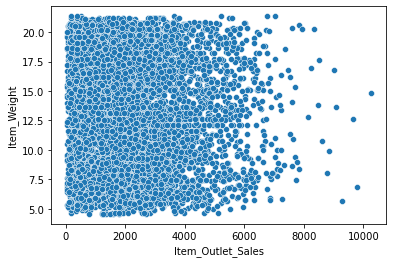

In [90]:
scater('Item_Weight')

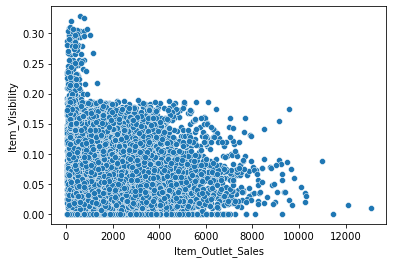

In [91]:
scater('Item_Visibility')

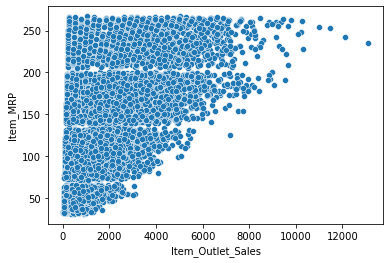

In [92]:
scater('Item_MRP')

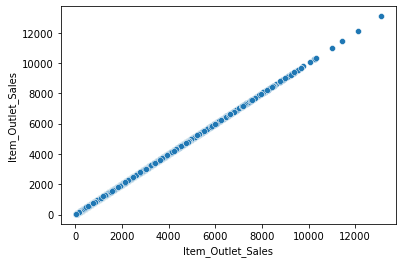

In [95]:
scater('Item_Outlet_Sales')

In [96]:
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_Outlet
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914,24.168133
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616,8.371760
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000,13.000000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400,18.000000
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000,23.000000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400,35.000000


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Weight'>

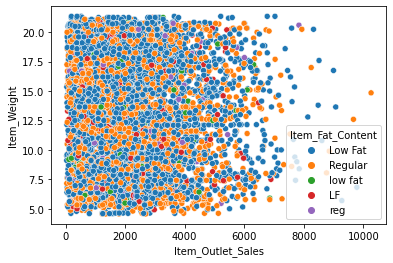

In [97]:
# Multivariante

sns.scatterplot(data=df, x='Item_Outlet_Sales', y='Item_Weight', hue='Item_Fat_Content')

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Visibility'>

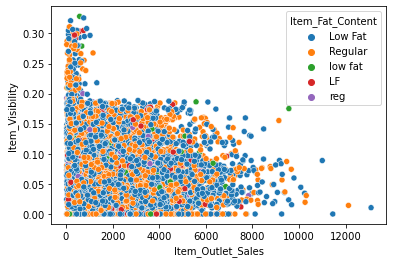

In [98]:
sns.scatterplot(data=df, x='Item_Outlet_Sales', y='Item_Visibility', hue='Item_Fat_Content')

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_MRP'>

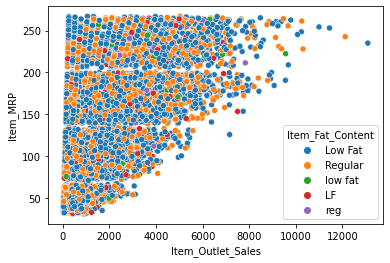

In [99]:
sns.scatterplot(data=df, x='Item_Outlet_Sales', y='Item_MRP', hue='Item_Fat_Content')

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_MRP'>

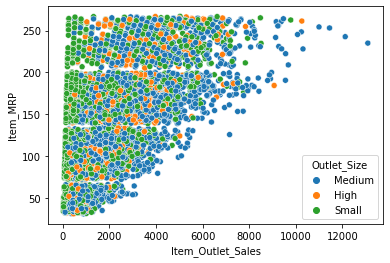

In [101]:
sns.scatterplot(data=df, x='Item_Outlet_Sales', y='Item_MRP', hue='Outlet_Size')

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

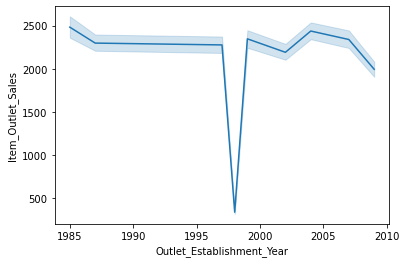

In [102]:
sns.lineplot(data=df, x='Outlet_Establishment_Year', y='Item_Outlet_Sales')

In [103]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [1]:
# There is suddent sales drop in year between 1997-199

C:\Users\HP\new_anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

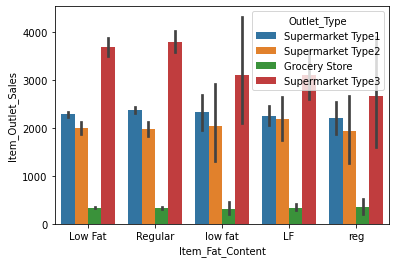

In [7]:
sns.barplot(data['Item_Fat_Content'],data['Item_Outlet_Sales'],hue=data['Outlet_Type'])

* SuperMarket Type3 gave more sales as compare to other stores, and the least sales were given by Grocery Stores.

C:\Users\HP\new_anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

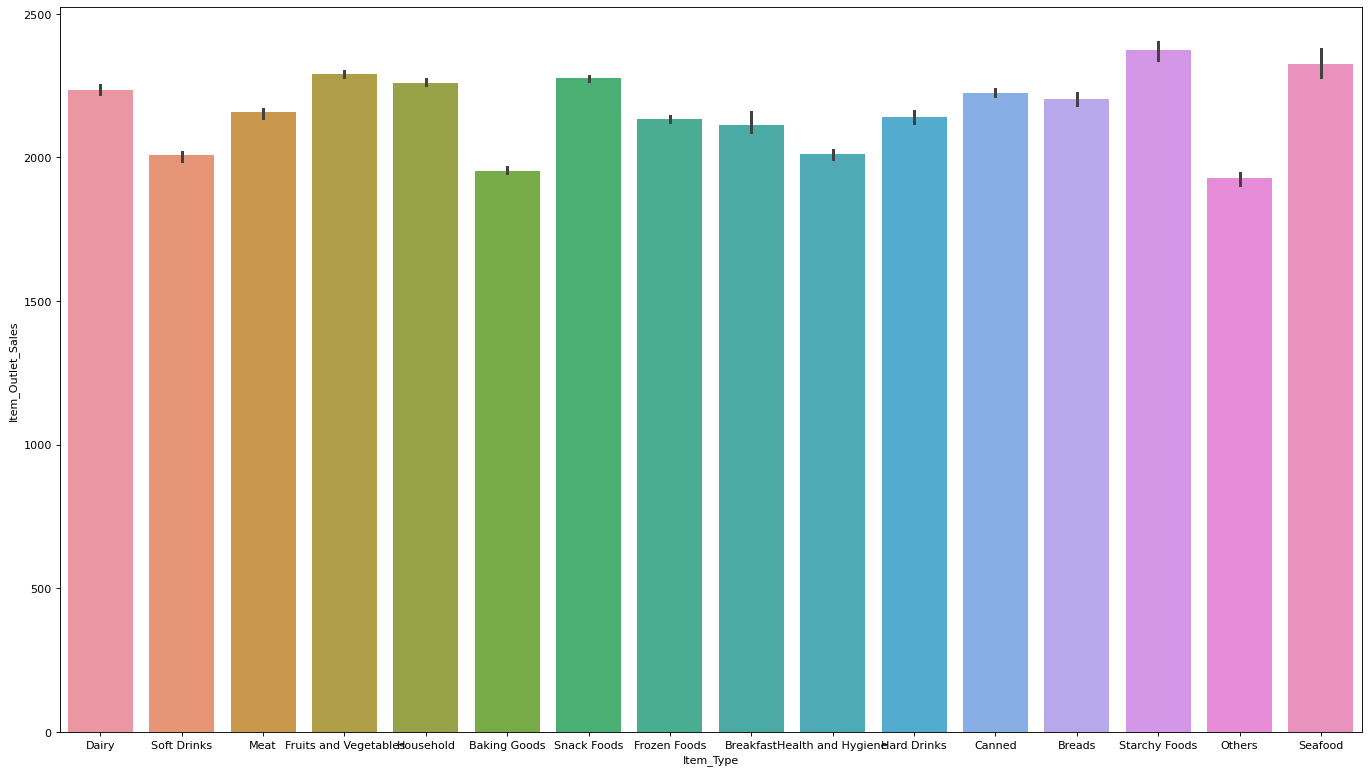

In [22]:
from matplotlib.pyplot import figure


figure(figsize=(21,12), dpi=80)
sns.barplot(data['Item_Type'],data['Item_Outlet_Sales'],ci=15)


C:\Users\HP\new_anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

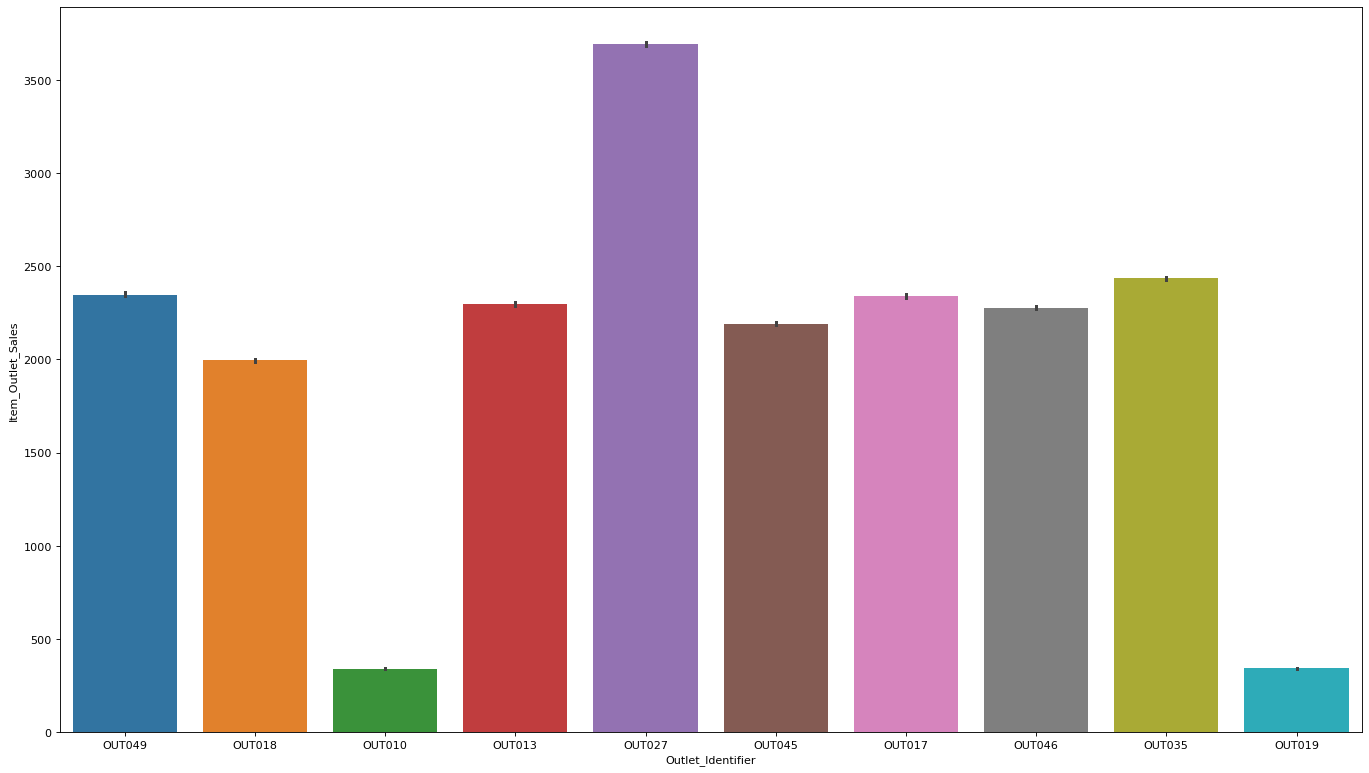

In [24]:
figure(figsize=(21,12), dpi=80)

sns.barplot(data['Outlet_Identifier'],data['Item_Outlet_Sales'],ci=15)


* Most of the sales are generated by OUTLET027 as compare to other Outlets.

C:\Users\HP\new_anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

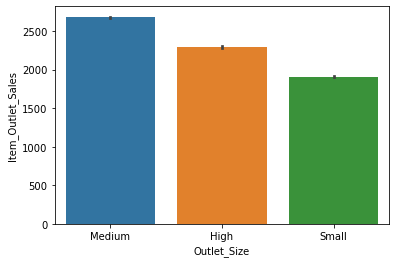

In [26]:
# figure(figsize=(21,12), dpi=80)
sns.barplot(data['Outlet_Size'],data['Item_Outlet_Sales'],ci=15)


In [4]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object